In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


# EDA

In [2]:
# Read train,test dataframe
train_df = pd.read_csv("/kaggle/input/playground-series-s3e19/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e19/test.csv")
train_df.sample(5)

,id,date,country,store,product,num_sold
100101,100101,2020-08-27,Japan,Kaggle Store,Using LLMs to Train More LLMs,157
90962,90962,2020-04-27,Spain,Kaggle Learn,Using LLMs to Win Friends and Influence People,7
54227,54227,2018-12-25,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,4
46403,46403,2018-09-11,Japan,Kaggle Store,Using LLMs to Win More Kaggle Competitions,127
52668,52668,2018-12-04,Canada,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,102


In [3]:
# Dataframe size
train_df.shape, test_df.shape

((136950, 6), (27375, 5))

In [4]:
# Dataframe information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [5]:
# Dataframe description
train_df.describe(include='all')

,id,date,country,store,product,num_sold
count,136950.00000,136950,136950,136950,136950,136950.000000
unique,NaN,1826,5,3,5,NaN
top,NaN,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,NaN
freq,NaN,75,27390,45650,27390,NaN
mean,68474.50000,NaN,NaN,NaN,NaN,165.522636
std,39534.20402,NaN,NaN,NaN,NaN,183.691575
min,0.00000,NaN,NaN,NaN,NaN,2.000000
25%,34237.25000,NaN,NaN,NaN,NaN,46.000000
50%,68474.50000,NaN,NaN,NaN,NaN,98.000000
75%,102711.75000,NaN,NaN,NaN,NaN,184.000000


In [6]:
# Number od null values
train_df.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [7]:
# Number of dublicated rows
train_df.duplicated().sum()

0

In [8]:
# Number of unique values
train_df.nunique()

id          136950
date          1826
country          5
store            3
product          5
num_sold      1028
dtype: int64

In [9]:
# country, store and product list
country_list = train_df.country.unique()
print("Country list : ", country_list,"\n")
store_list = train_df.store.unique()
print("Store list : ", store_list,"\n")
product_list = train_df["product"].unique()
print("Product list : ", product_list,"\n")

Country list :  ['Argentina' 'Canada' 'Estonia' 'Japan' 'Spain'] 

Store list :  ['Kaggle Learn' 'Kaggle Store' 'Kagglazon'] 

Product list :  ['Using LLMs to Improve Your Coding' 'Using LLMs to Train More LLMs'
 'Using LLMs to Win Friends and Influence People'
 'Using LLMs to Win More Kaggle Competitions' 'Using LLMs to Write Better'] 



In [10]:
# group by country and store for seeing count of product
df_group = train_df[['country', 'store', 'product']].drop_duplicates()
print(df_group.groupby(['country', 'store'])['product'].count())

country    store       
Argentina  Kagglazon       5
           Kaggle Learn    5
           Kaggle Store    5
Canada     Kagglazon       5
           Kaggle Learn    5
           Kaggle Store    5
Estonia    Kagglazon       5
           Kaggle Learn    5
           Kaggle Store    5
Japan      Kagglazon       5
           Kaggle Learn    5
           Kaggle Store    5
Spain      Kagglazon       5
           Kaggle Learn    5
           Kaggle Store    5
Name: product, dtype: int64


In [11]:
# function to pick random number
import random
def rand_pick (dataList):
    return random.randint(1, len(dataList)) - 1

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


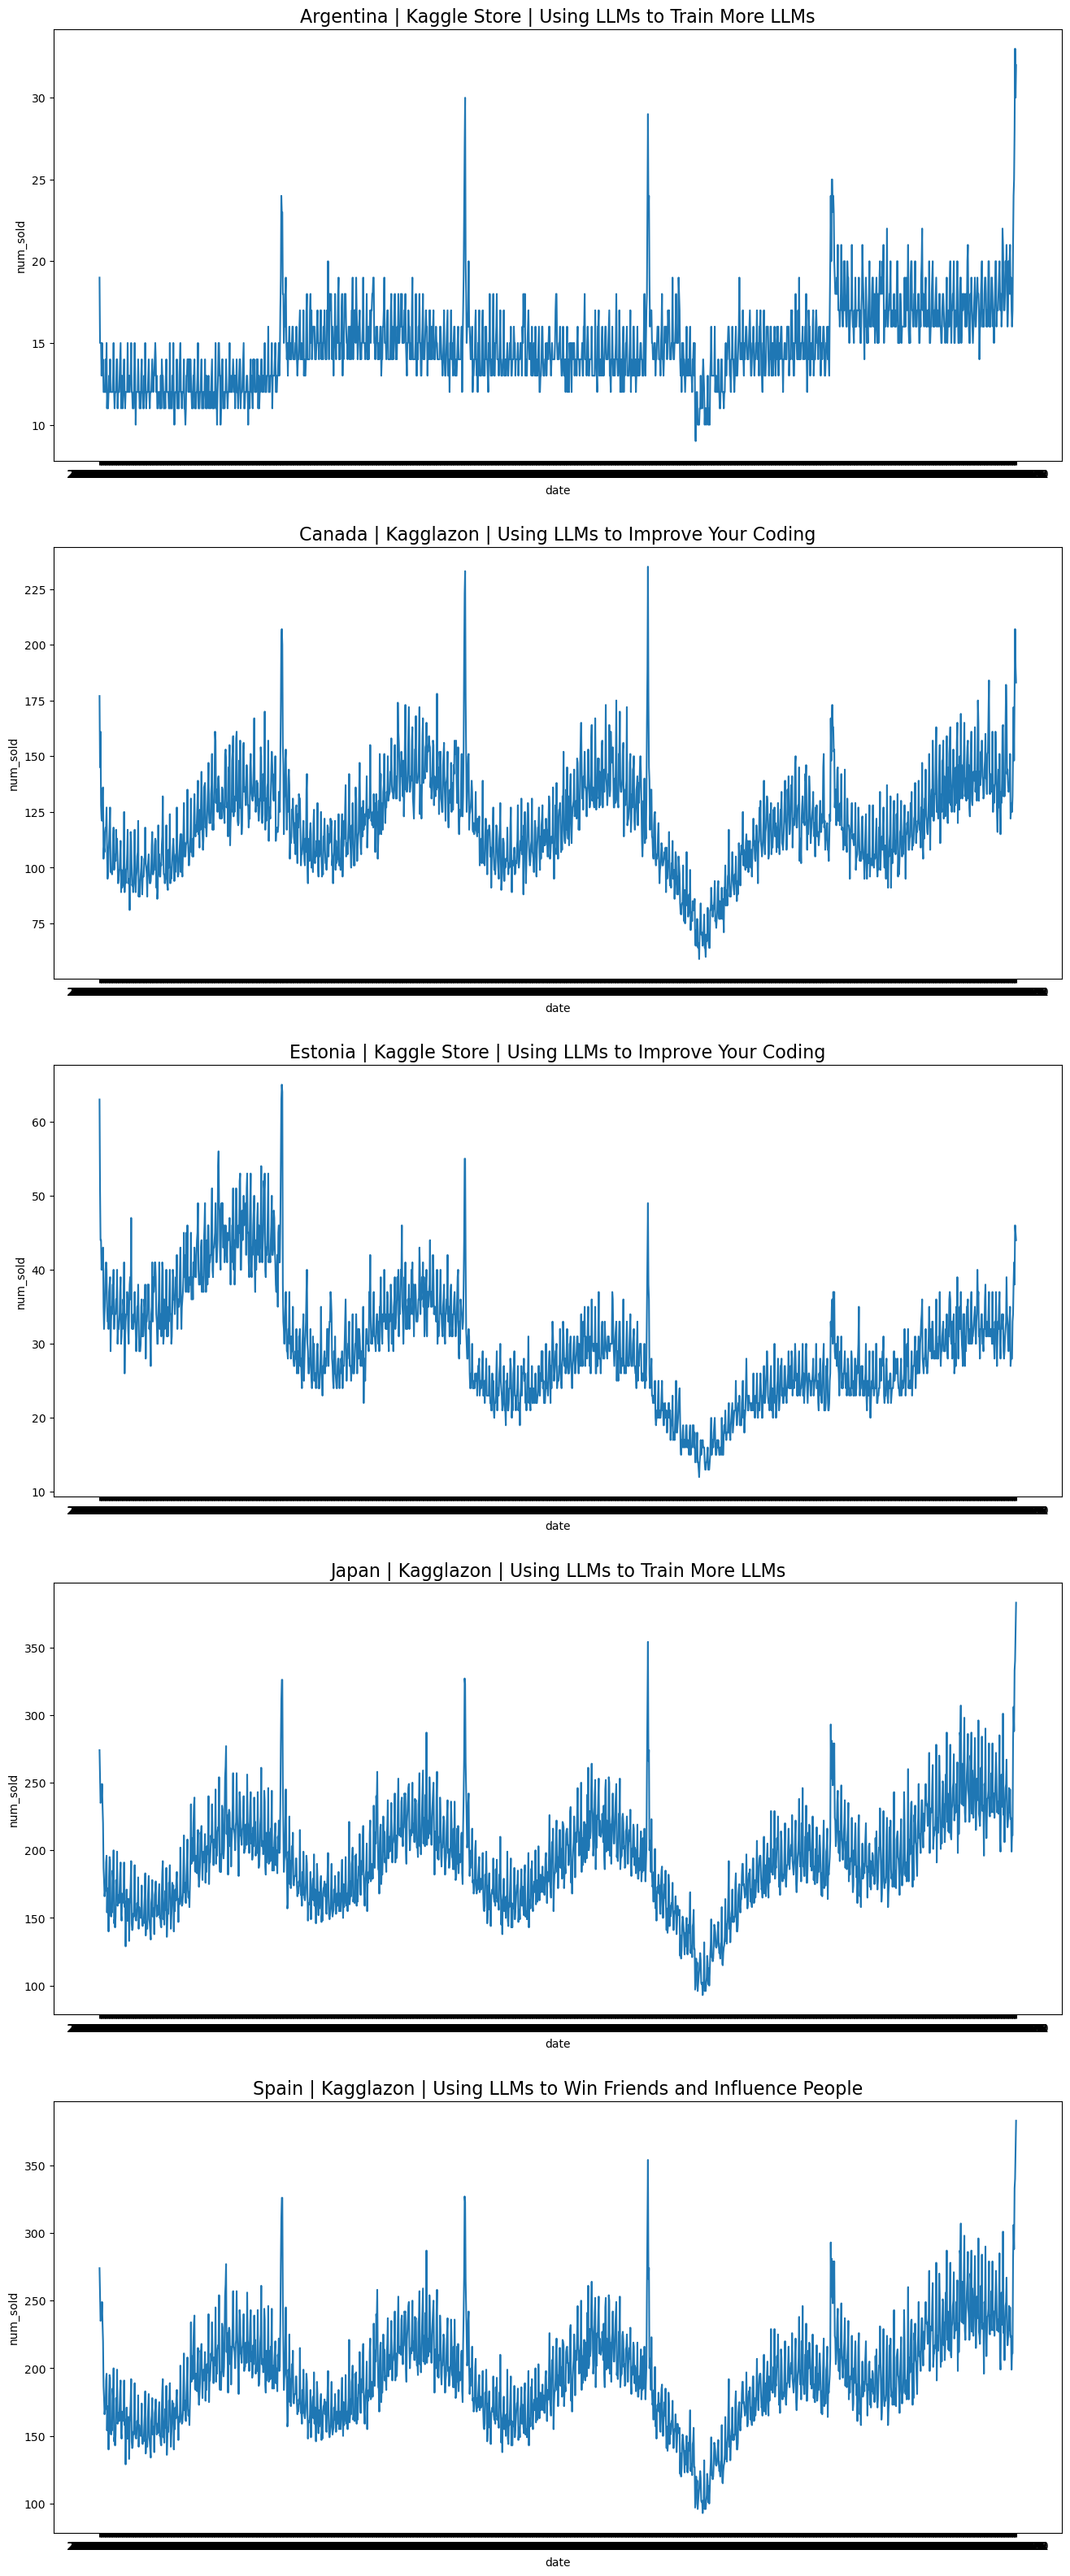

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(5, 1, figsize=(16,40))

# Display few trend graph correspoding country
for i, country in enumerate(train_df.country.unique()):
    df_selected = train_df[(train_df['country'] == country_list[rand_pick(country_list)])
                           & (train_df['store'] == store_list[rand_pick(store_list)])
                           & (train_df['product'] == product_list[rand_pick(store_list)])]
    
    # Line plot of the num_sold over time
    sns.lineplot(x='date', y='num_sold', data=df_selected, ax=axs[i])
    
    axs[i].set_title(country + ' | ' + store_list[rand_pick(store_list)] + ' | '+
    product_list[rand_pick(store_list)] , fontsize=16)

plt.show()

# Data Preprocessing

In [13]:
# Extract date from dataframe
def extract_date(df, columnName):
    df[columnName] = pd.to_datetime(df[columnName])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['day_name'] = df.date.dt.strftime('%A')
    df['day_of_year'] = df.date.dt.dayofyear
    df['day_of_week'] = df.date.dt.dayofweek
    df['day_of_month'] = df.date.dt.day
    return df

In [14]:
processed_train_df = extract_date(train_df,"date")
processed_test_df = extract_date(test_df, "date")
processed_train_df.sample(5)

,id,date,country,store,product,num_sold,year,month,day_name,day_of_year,day_of_week,day_of_month
122771,122771,2021-06-25,Spain,Kagglazon,Using LLMs to Train More LLMs,433,2021,6,Friday,176,4,25
32611,32611,2018-03-11,Spain,Kaggle Learn,Using LLMs to Train More LLMs,108,2018,3,Sunday,70,6,11
133892,133892,2021-11-21,Canada,Kaggle Learn,Using LLMs to Win Friends and Influence People,25,2021,11,Sunday,325,6,21
101687,101687,2020-09-17,Spain,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2020,9,Thursday,261,3,17
12543,12543,2017-06-17,Canada,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,92,2017,6,Saturday,168,5,17


In [15]:
# One-hot encode the categorical variables
train_data_encoded = pd.get_dummies(processed_train_df, columns=["country", "store", "product","day_name"])
test_data_encoded = pd.get_dummies(processed_test_df, columns=["country", "store", "product","day_name"])
train_data_encoded.head()

,id,date,num_sold,year,month,day_of_year,day_of_week,day_of_month,country_Argentina,country_Canada,...,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,2017-01-01,63,2017,1,1,6,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,2017-01-01,66,2017,1,1,6,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2017-01-01,9,2017,1,1,6,1,1,0,...,1,0,0,0,0,0,1,0,0,0
3,3,2017-01-01,59,2017,1,1,6,1,1,0,...,0,1,0,0,0,0,1,0,0,0
4,4,2017-01-01,49,2017,1,1,6,1,1,0,...,0,0,1,0,0,0,1,0,0,0


# Modeling

## Split train data into train test

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into features X and target y
X = train_data_encoded.drop(['id', 'date', 'num_sold'], axis=1)
y = train_data_encoded['num_sold']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Train a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_val, y_val_pred)
mae

8.241485578678349

## XGBRegressor

In [18]:
from xgboost import XGBRegressor

# Train the XGBoost model with the target variable
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_val, y_val_pred)
mae

9.563572617096051

In [22]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Initialize a scaler
scaler = StandardScaler()

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Train the XGBoost model with the target variable
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train_scaled)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_val, y_val_pred)
mae

9.252622523562735

## Train with whole train data and save submission

In [23]:
X_train = train_data_encoded.drop(['id', 'date', 'num_sold'], axis=1)
y_train = train_data_encoded['num_sold']
X_test = test_data_encoded.drop(['id', 'date'], axis=1)


In [24]:
from xgboost import XGBRegressor

# Fit the scaler and transform the target variable
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Train the XGBoost model with the scaled target variable
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set and inverse transform the predictions
y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

# save sample_submission.csv with id and num_sold
output= pd.DataFrame({'id':test_data_encoded['id'],'num_sold':y_test_pred.flatten()})
output.to_csv('/kaggle/working/sample_submission..csv', index=False)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Train a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_test_pred = model.predict(X_test)

# save sample_submission.csv with id and num_sold
output= pd.DataFrame({'id':test_data_encoded['id'],'num_sold':y_test_pred})
output.to_csv('/kaggle/working/sample_submission.csv', index=False)

In [ ]:
#import packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# model object
RF = RandomForestRegressor(random_state=1)

#parameter for RF
PRF = [{'n_estimators':[10,100],'max_depth':[3,6],'criterion':['squared_error','absolute_error']}]

# parameter tunning by GridSearchCV
GSRF = GridSearchCV(estimator=RF, param_grid=PRF, scoring="neg_mean_absolute_error",cv=2)

#score with cross validation 5
rf_scores = cross_val_score(GSRF,X_train,y_train,scoring="neg_mean_absolute_error",cv=5)

In [ ]:
rf_scores